In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

plt.style.use('seaborn-darkgrid')

In [10]:
def classify(num, avg):
    if num > avg:
        return 1
    elif num < avg:
        return 0
    
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [11]:
COVID_DF = pd.read_csv('COVID_AllData.csv', index_col = 0)
COVID_DF.head()

,State,cases,deaths,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,...,Social Scientists 2018,Social Scientists 2018 (Percent),Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars)
0,Alabama,387786,14345,119662909,18553159,35924229,49537638,76667112,101687773,114405941,...,3195.000000,0.170005,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0
1,Alaska,18316,367,23969001,2848087,6184956,8915998,14554105,20064361,22927860,...,1090.000000,0.345757,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0
2,Arizona,426614,18857,197753744,33609317,63073164,85351788,128616004,168531690,189378565,...,7870.000000,0.282127,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0
3,Arkansas,161569,3301,74634888,16319991,26475276,34256878,49689104,64088761,71584342,...,2426.923077,0.209530,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0
4,California,2664110,102387,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,...,50350.000000,0.296043,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0


In [12]:
COVID_DF = COVID_DF.drop(columns = ['cases', 'deaths'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Social Scientists 2018,Social Scientists 2018 (Percent),Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars)
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,3195.000000,0.170005,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,1090.000000,0.345757,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,7870.000000,0.282127,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,2426.923077,0.209530,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,50350.000000,0.296043,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0


In [13]:
COVID_Case = pd.read_csv('COVID.csv', index_col = 0)
COVID_Case.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [14]:
COVID_DF = pd.merge(COVID_DF, COVID_Case, how = 'left', on = 'State')
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202


In [15]:
COVID_DF = COVID_DF.rename(columns = {'Total population_HISPANIC OR LATINO':'Hispanic or Latino'})
COVID_DF = COVID_DF.drop(columns = ['RACE_Total population'])
COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202


In [16]:
COVID_DF['Hispanic or Latino'] = (COVID_DF['Total Population'])-(COVID_DF['White'] + COVID_DF['Black or African American'] + 
                                                     COVID_DF['American Indian and Alaska Native'] + COVID_DF['Asian'] + 
                                                     COVID_DF['Native Hawaiian and Other Pacific Islander'])

COVID_DF.head()

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,25768.461538,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,6370.000000,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,40286.923077,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,11790.000000,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,266500.000000,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202


In [17]:
COVID_DF.shape

(51, 95)

In [18]:
columns = [col for col in COVID_DF.columns if '(Percent)' not in col][1:]
columns = columns[:-2]
columns

['AGI Total',
 'AGI Top 1 Percent',
 'AGI Top 5 Percent',
 'AGI Top 10 Percent',
 'AGI Top 25 Percent',
 'AGI Top 50 Percent',
 'AGI Top 75 Percent',
 'Total Population',
 'Total population_Male',
 'Total population_Female',
 'Under 5 years',
 '5 to 9 years',
 '10 to 14 years',
 '15 to 19 years',
 '20 to 24 years',
 '25 to 34 years',
 '35 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 to 64 years',
 '65 to 74 years',
 '75 to 84 years',
 '85 years and over',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Hispanic or Latino',
 '4th 2015 Math',
 '4th 2015 Science',
 '8th 2015 Math',
 '8th 2015 Science',
 'Labor Force w/ Bachelor 2018',
 'Labor Force Participants 2018',
 'Percent of Labor Force w/ Bachelor 2018',
 'Doctorate From Doc Inst 2018',
 'Doctorate From Bach Inst 2018',
 'Total Doctorate Degrees 2018',
 'Less Than HS Diploma 14-18',
 'HS Diploma 14-18',
 'Some College or Associate D

In [19]:
model1 = sm.OLS(COVID_DF['cases'], COVID_DF[columns]).fit()
model1.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                nan
Time:                        02:22:25   Log-Likelihood:                 808.19
No. Observations:                  51   AIC:                            -1514.
Df Residuals:                       0   BIC:                            -1416.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Total                                                            0.0602        inf          0        nan         nan         nan
AGI Top 1 Percent                                                    0.0136        inf          0        nan         nan         nan
AGI Top 5 Percent                                                    0.0681        inf          0        nan         nan         nan
AGI Top 10 Percent                                                  -0.1508        inf         -0        nan         nan         nan
AGI Top 25 Percent                                                   0.0744        inf          0        nan         nan         nan
AGI Top 50 Percent                                                   0.0558        inf          0        nan         nan         nan
AGI Top 75 Percent                                                  -0.1197        inf         -0        nan         nan         nan
Total Population                                                     0.2047        inf          0        nan         nan         nan
Total population_Male                                               -0.1400        inf         -0        nan         nan         nan
Total population_Female                                              0.3448        inf          0        nan         nan         nan
Under 5 years                                                       -1.0336        inf         -0        nan         nan         nan
5 to 9 years                                                         0.3512        inf          0        nan         nan         nan
10 to 14 years                                                       0.1873        inf          0        nan         nan         nan
15 to 19 years                                                       0.3019        inf          0        nan         nan         nan
20 to 24 years                                                      -0.8831        inf         -0        nan         nan         nan
25 to 34 years                                                       0.2788        inf          0        nan         nan         nan
35 to 44 years                                                       0.0762        inf          0        nan         nan         nan
45 to 54 years                                                       0.0843        inf          0        nan         nan         nan
55 to 59 years                                                      -0.4010        inf         -0        nan         nan         nan
60 to 64 years                                                       0.7167        inf          0        nan         nan         nan
65 to 74 years          

In [37]:
test_len = int(0.25 * len(COVID_DF))
train_len = len(COVID_DF) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DF[:train_len]
test = COVID_DF[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 96)
Test Set Shape: (12, 96)


## Linear Regression

In [21]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

LinearModel = LinearRegression()
LinearModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = LinearModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = LinearModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 2.7378122561061996e-10
Train MSE Value: 1.9802279669333557e-19
Train RMS Value: 4.449975243676481e-10
Train R2 Score: 1.0


Test MAE Value: 18708.728841716093
Test MSE Value: 777924510.6527573
Test RMS Value: 27891.29811702491
Test R2 Score: -0.13428138520010924


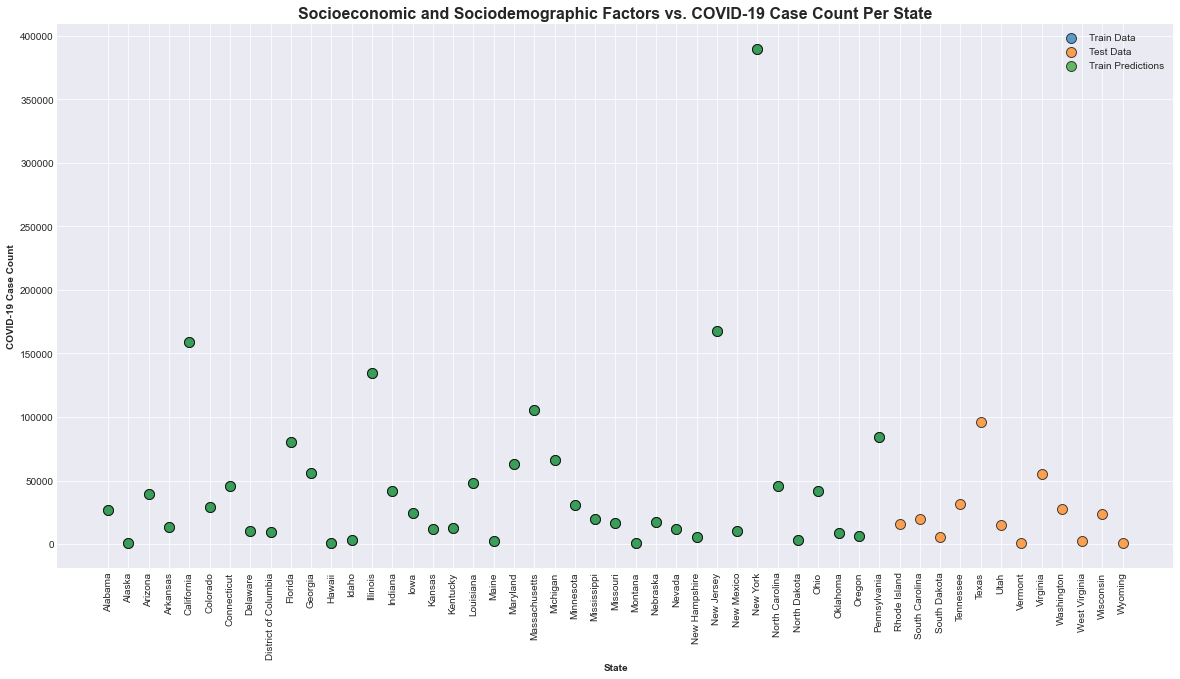

In [22]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

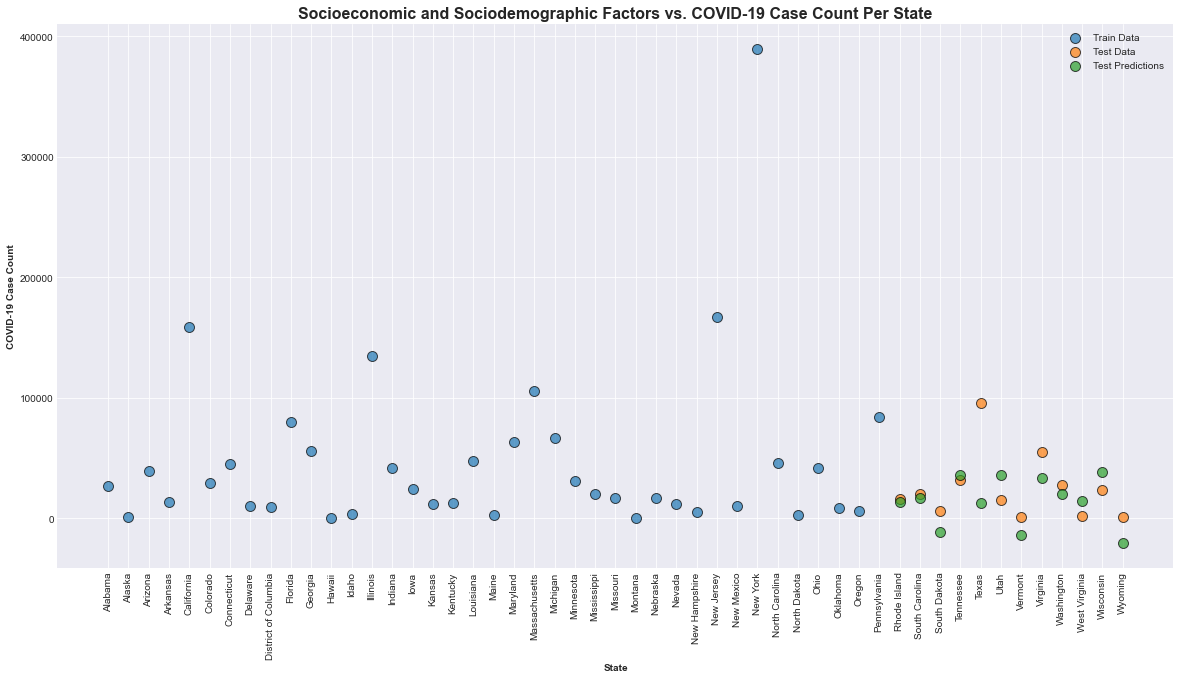

In [23]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [24]:
evaluate(LinearModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


100.00000000000026

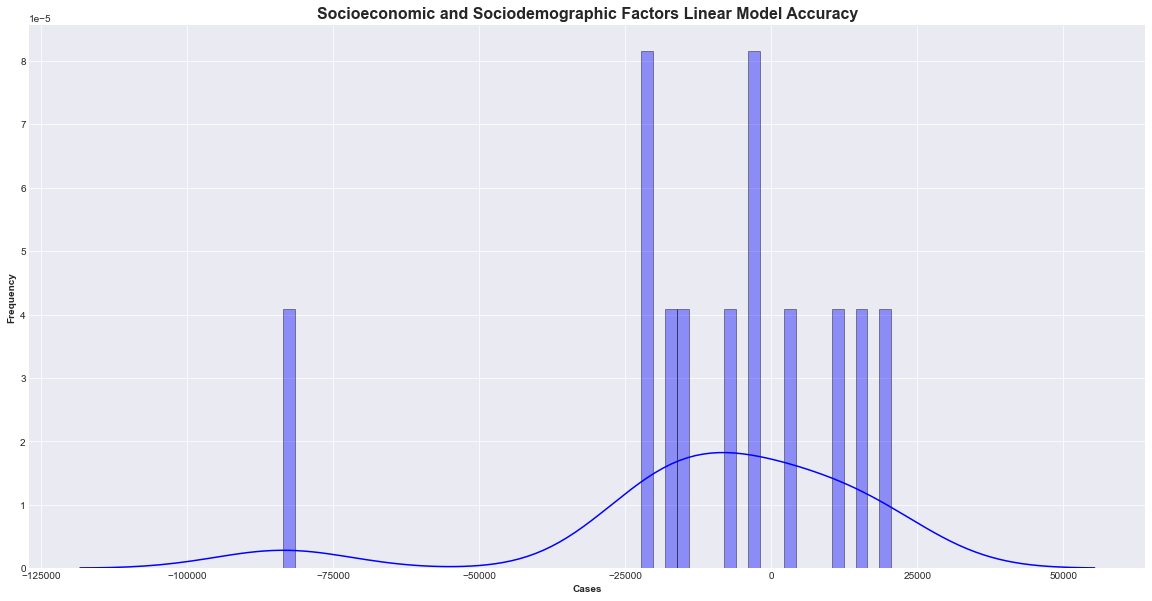

In [25]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Linear Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## SVR

In [26]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

SVRModel = SVR(kernel = 'linear')
SVRModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = SVRModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = SVRModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 6389.34498449703
Train MSE Value: 47060280.80965075
Train RMS Value: 6860.049621515193
Train R2 Score: 0.9902764413549427


Test MAE Value: 4809.665892516921
Test MSE Value: 39264447.91183321
Test RMS Value: 6266.135005873494
Test R2 Score: 0.9427490305850105


c:\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


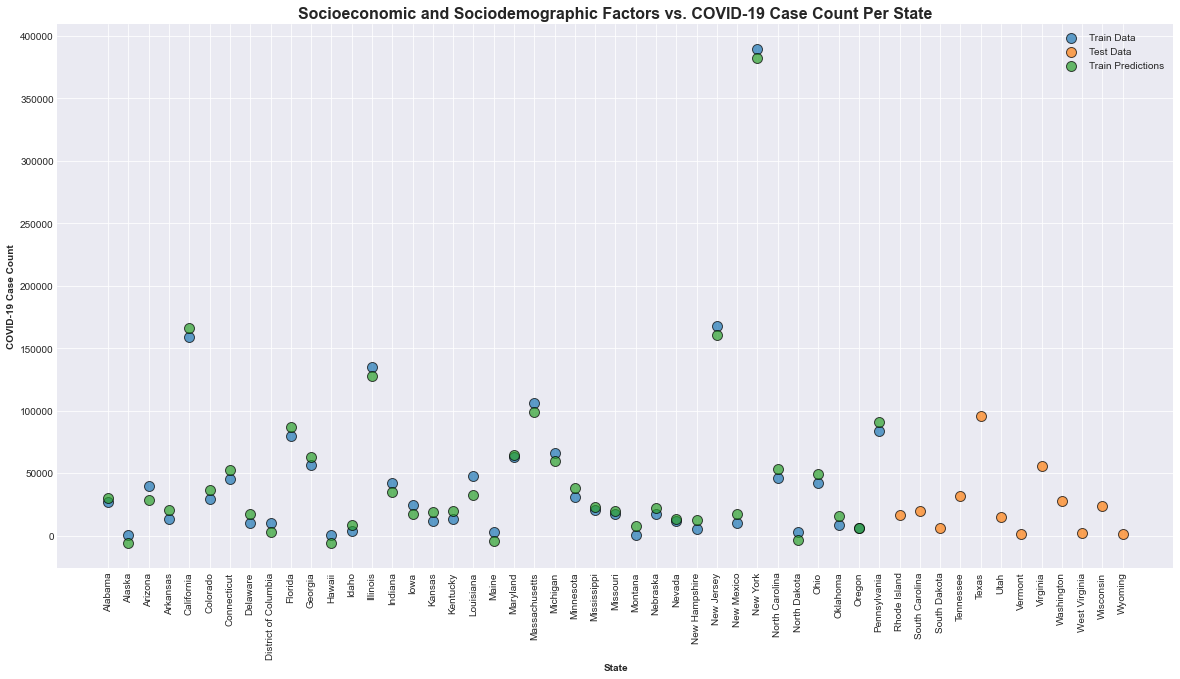

In [27]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

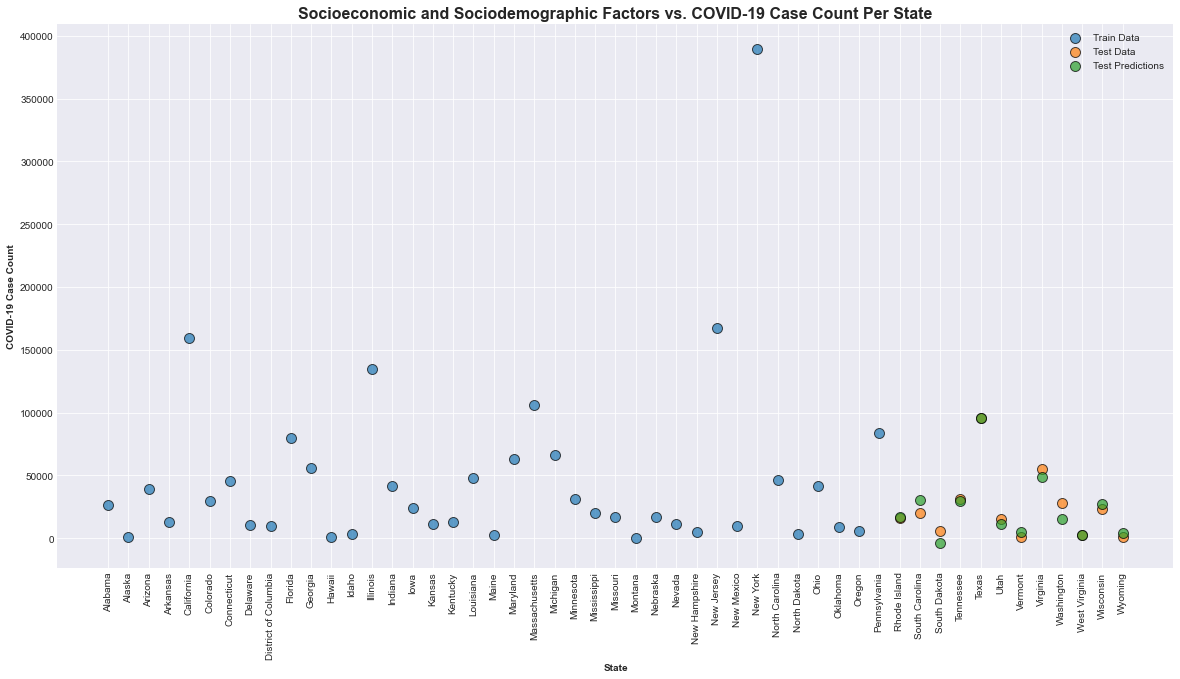

In [28]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [29]:
evaluate(SVRModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8343 degrees.
Accuracy = 94.46%.


94.45729349313598

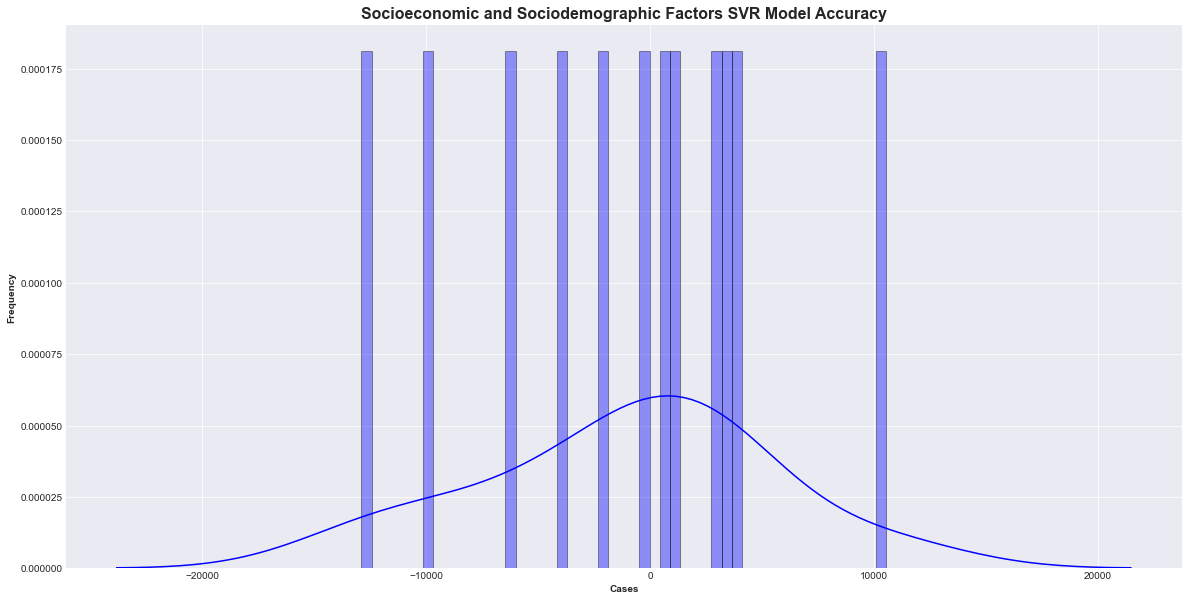

In [30]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors SVR Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Random Forest Regression

In [52]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

RanForModel = RandomForestRegressor()
RanForModel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = RanForModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RanForModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 10429.328141025646
Train MSE Value: 424874183.12840337
Train RMS Value: 20612.47639485376
Train R2 Score: 0.9122128264994835


Test MAE Value: 17222.995611111106
Test MSE Value: 1189494930.5786226
Test RMS Value: 34489.05522884938
Test R2 Score: -0.7343867419900347


<ipython-input-52-e8fbe4dc92cb>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RanForModel.fit(X_train_scaled, y_train_scaled)


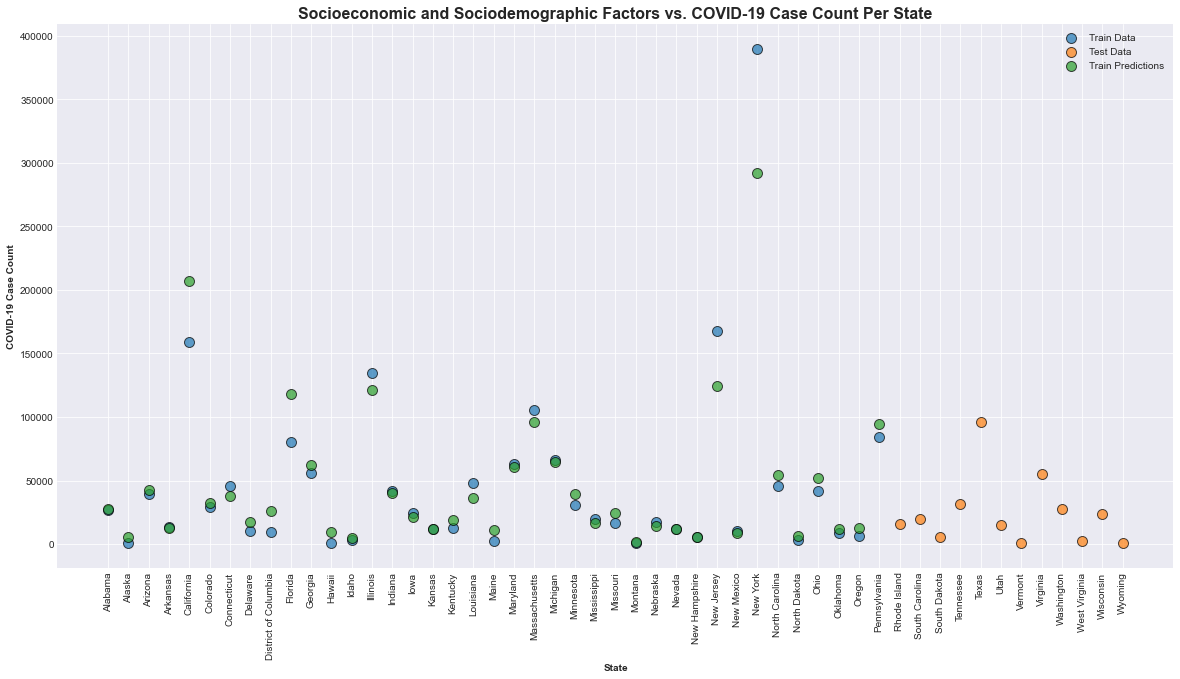

In [53]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

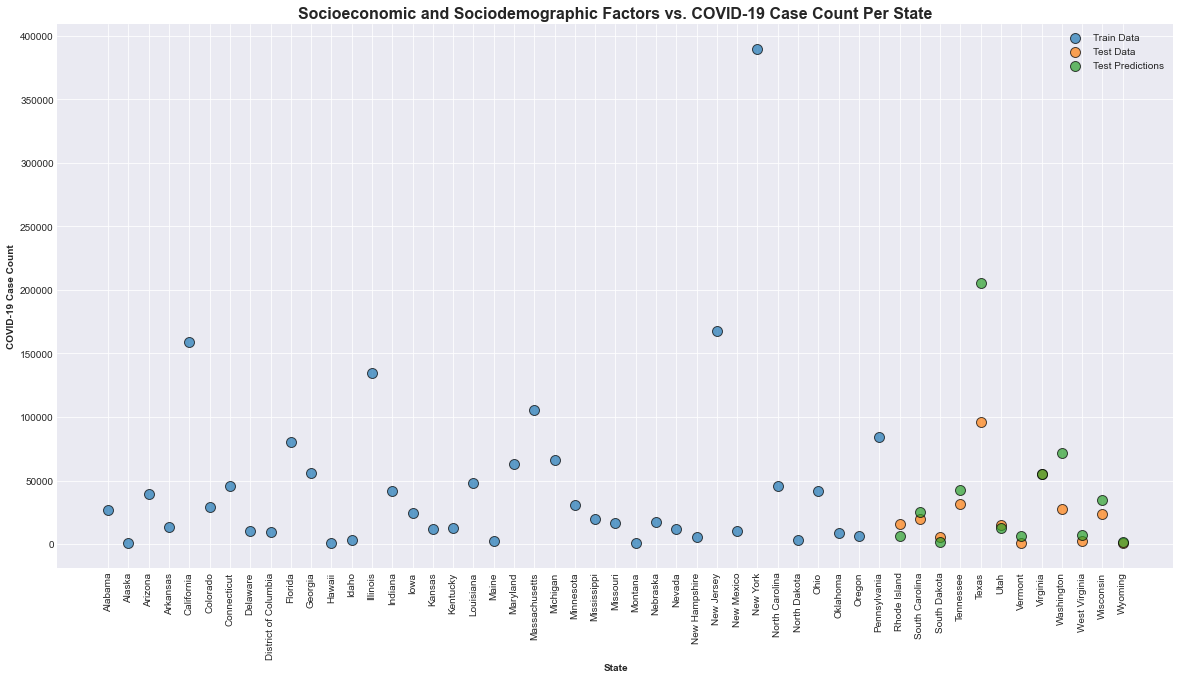

In [54]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [55]:
evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7996 degrees.
Accuracy = 93.20%.


93.19942484549051

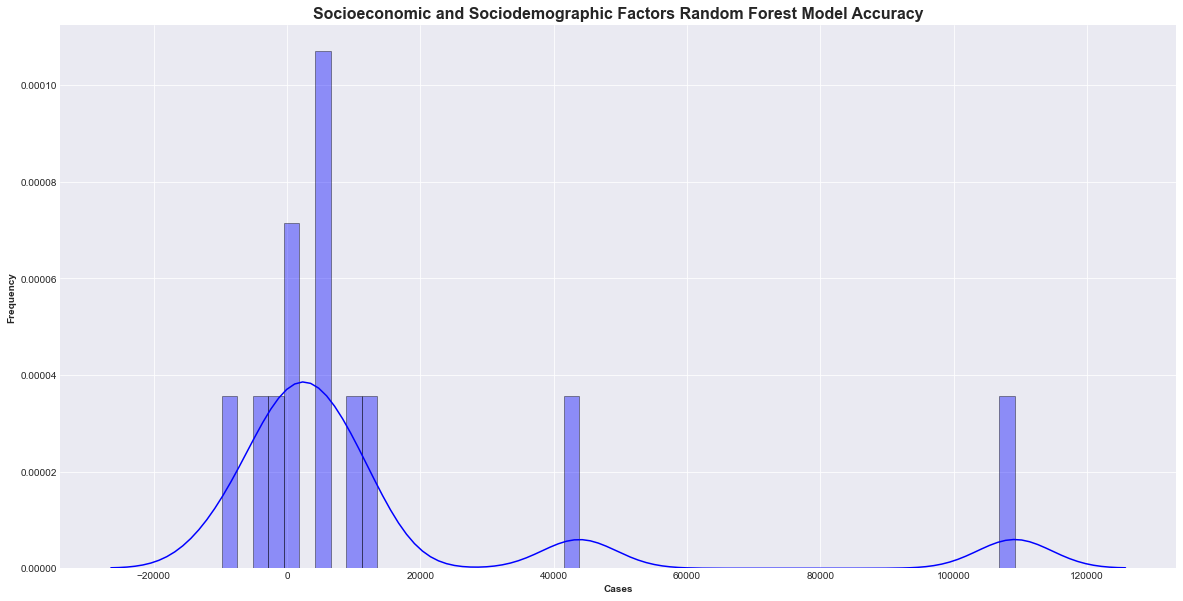

In [56]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': list(range(0, len(columns)+1)),
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

kfold = KFold(n_splits = 10)

RF_NewModel = GridSearchCV(estimator = RanForModel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

RF_NewModel.fit(X_train_scaled, y_train_scaled);

Fitting 10 folds for each of 11520 candidates, totalling 115200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [58]:
train_predictions_scaled = RF_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = RF_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 12303.702925498648
Train MSE Value: 1105577433.0852275
Train RMS Value: 33250.22455691431
Train R2 Score: 0.7715664500443962


Test MAE Value: 18070.098907428215
Test MSE Value: 1135867836.3793252
Test RMS Value: 33702.63841866576
Test R2 Score: -0.6561937889982399


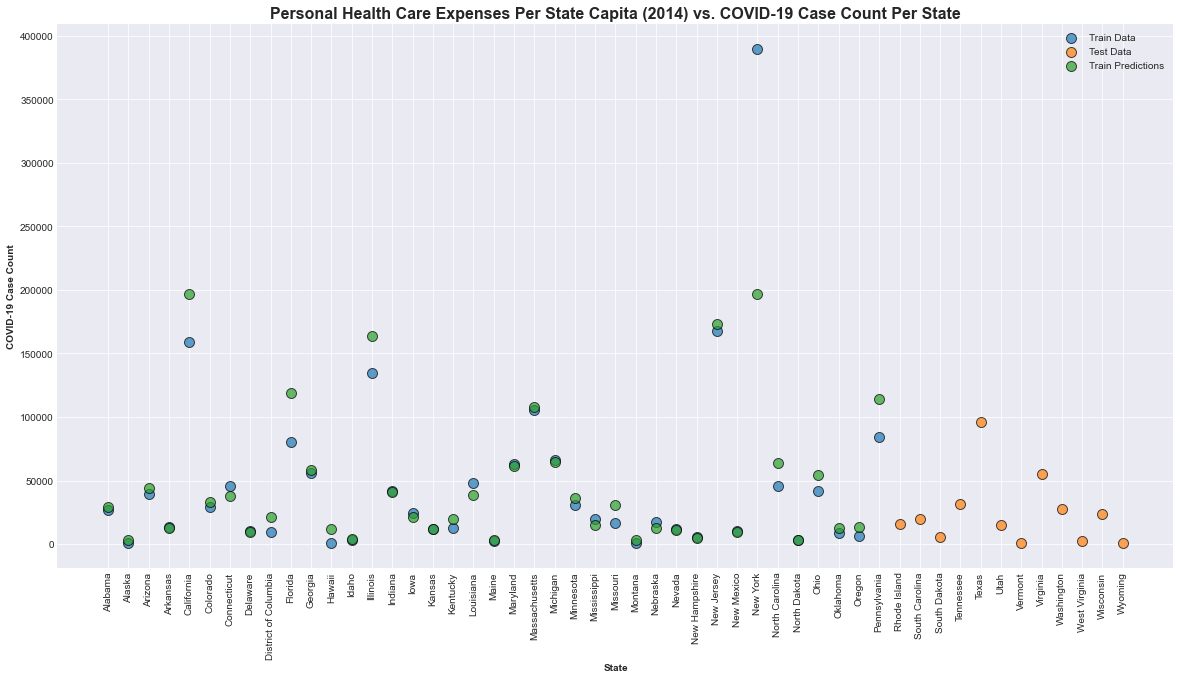

In [59]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

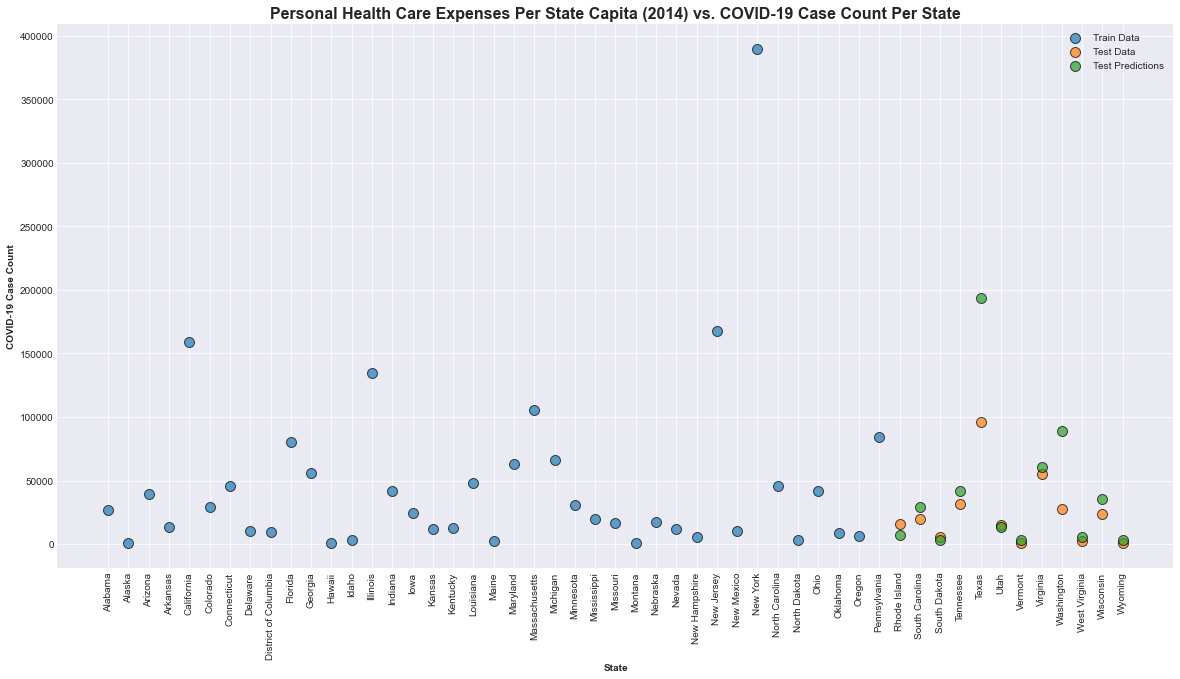

In [60]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Personal Health Care Expenses Per State Capita (2014) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [61]:
RF_NewModel.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 63,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [62]:
base_accuracy = evaluate(RanForModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7996 degrees.
Accuracy = 93.20%.


In [63]:
new_accuracy = evaluate(RF_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8052 degrees.
Accuracy = 94.15%.


In [64]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 1.01%.


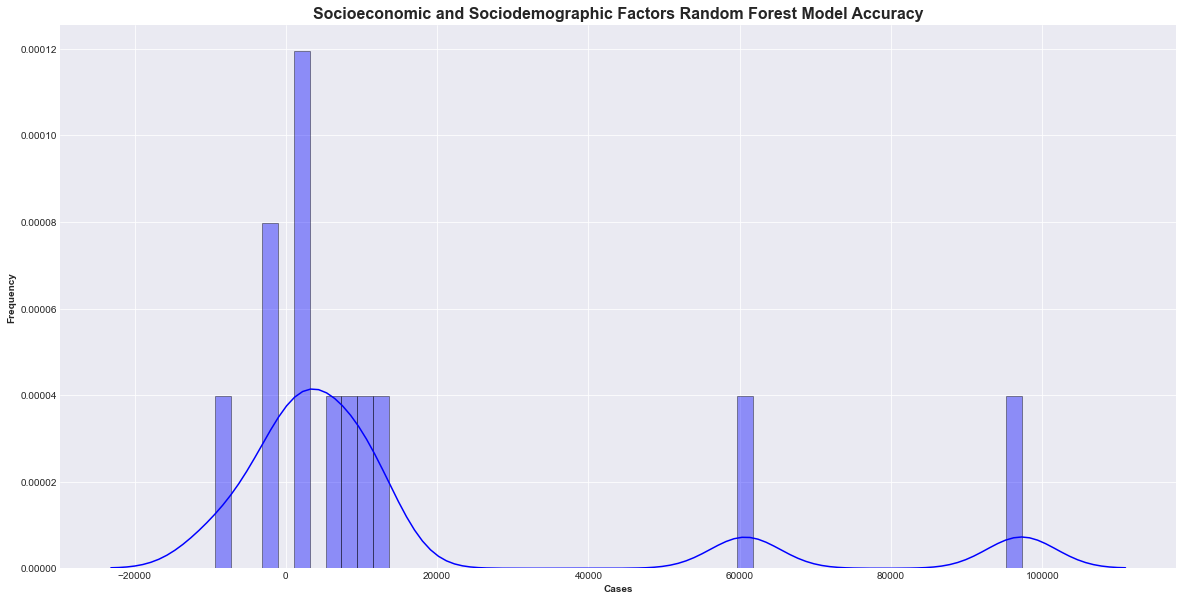

In [65]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors Random Forest Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## XGBoost

In [38]:
features_list = columns
    
target = 'cases'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))

XGBmodel = XGBRegressor()
XGBmodel.fit(X_train_scaled, y_train_scaled)

train_predictions_scaled = XGBmodel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XGBmodel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 21.29832262870593
Train MSE Value: 947.9825378437646
Train RMS Value: 30.789325063141032
Train R2 Score: 0.9999998041285848


Test MAE Value: 28994.83055114746
Test MSE Value: 4411449715.285884
Test RMS Value: 66418.74521011281
Test R2 Score: -5.4322761723967075


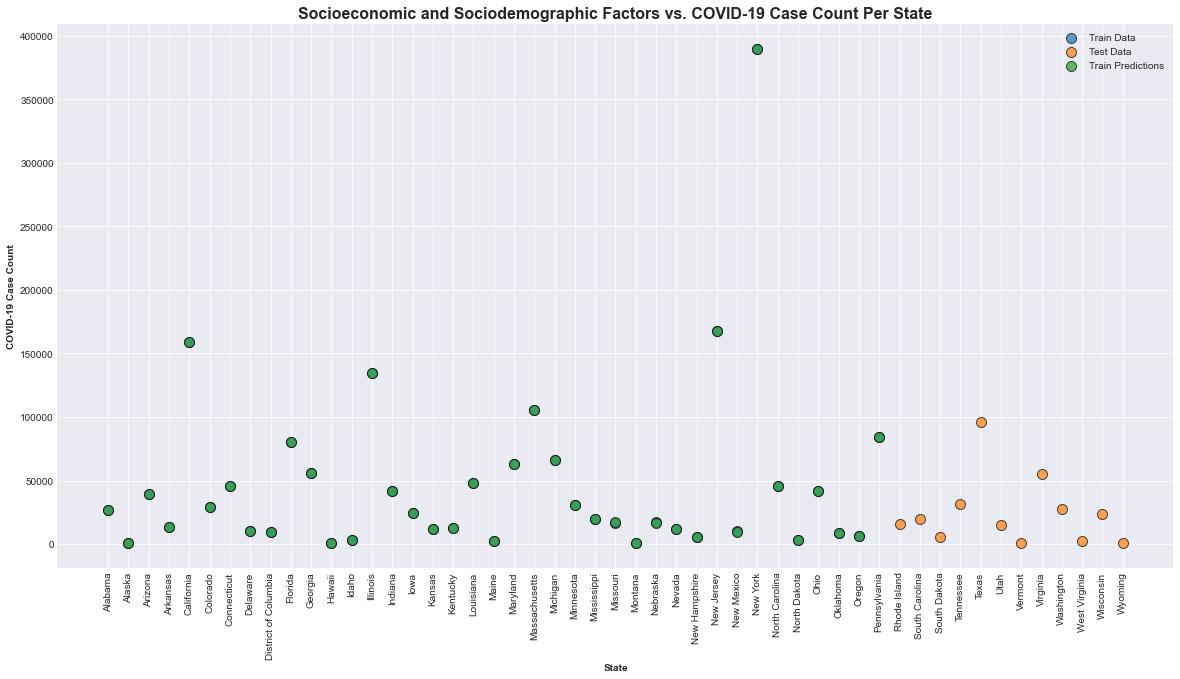

In [39]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

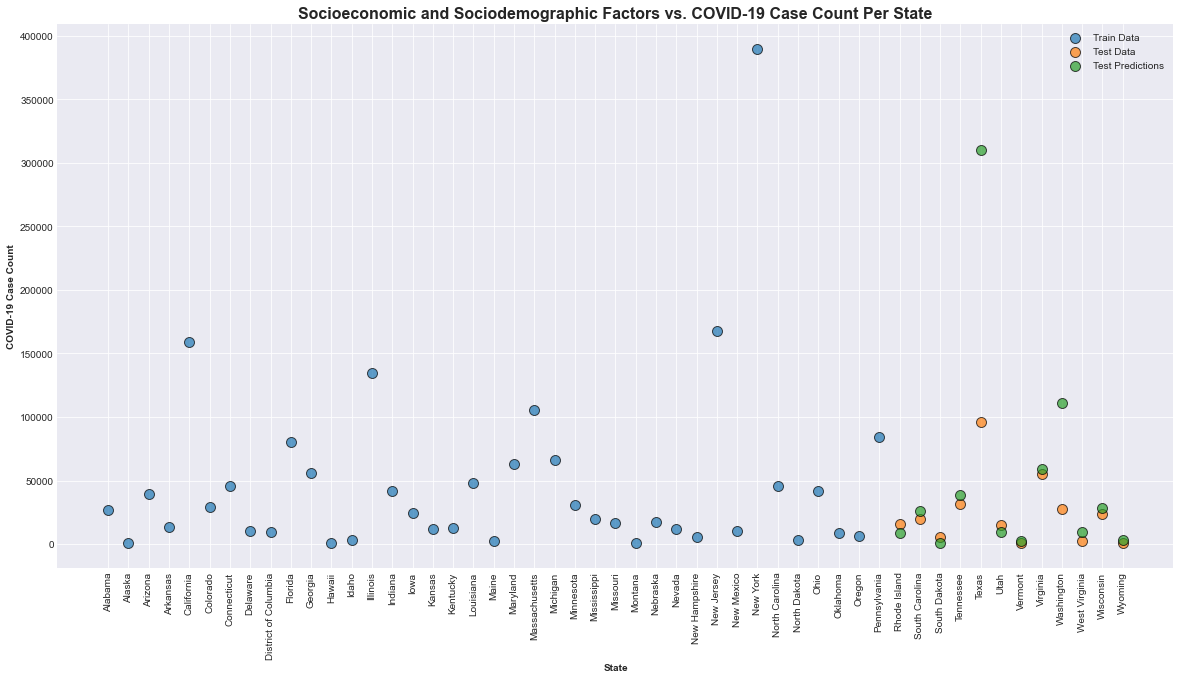

In [40]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [41]:
evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8310 degrees.
Accuracy = 91.25%.


91.2524423501398

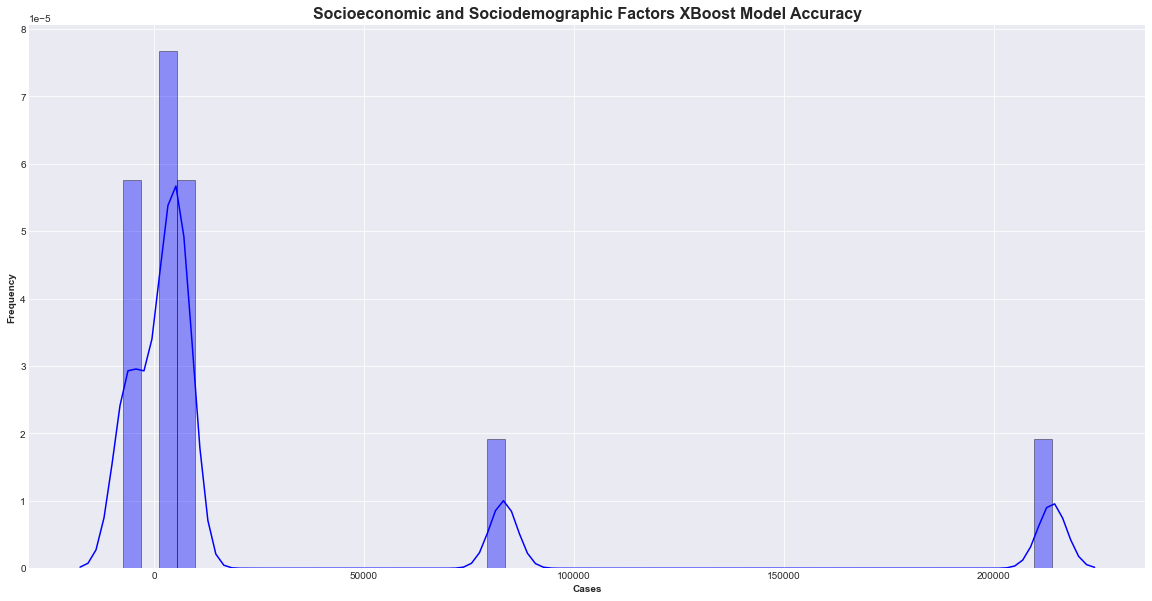

In [42]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

In [43]:
param_grid = {
    "learning_rate": [0.05, 0.075, 0.1, 0.2, 0.3, 0.4],
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "reg_lambda": [1, 1.5, 2, 3, 4.5],
    "min_child_weight": [1, 3, 5, 7],
    "n_estimators": [50, 100, 200, 300, 400, 500, 1000]
}

kfold = KFold(n_splits = 4)

XG_GridModel = GridSearchCV(estimator = XGBmodel, param_grid = param_grid, 
                          cv = kfold, n_jobs = -1, verbose = 2, return_train_score=True)

XG_NewModel = XG_GridModel.fit(X_train_scaled, y_train_scaled);

Fitting 4 folds for each of 5880 candidates, totalling 23520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5597 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7541 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9252 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 10613 tasks      |

In [44]:
XG_NewModel.best_params_

{'learning_rate': 0.075,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 50,
 'reg_lambda': 4.5}

In [45]:
train_predictions_scaled = XG_NewModel.predict(X_train_scaled)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
test_predictions_scaled = XG_NewModel.predict(X_test_scaled)
test_predictions = scaler.inverse_transform(test_predictions_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 11088.21960136218
Train MSE Value: 1098271804.097937
Train RMS Value: 33140.18412890817
Train R2 Score: 0.7730759334277248


Test MAE Value: 15162.9951171875
Test MSE Value: 520048675.6068344
Test RMS Value: 22804.57576029062
Test R2 Score: 0.2417239409980383


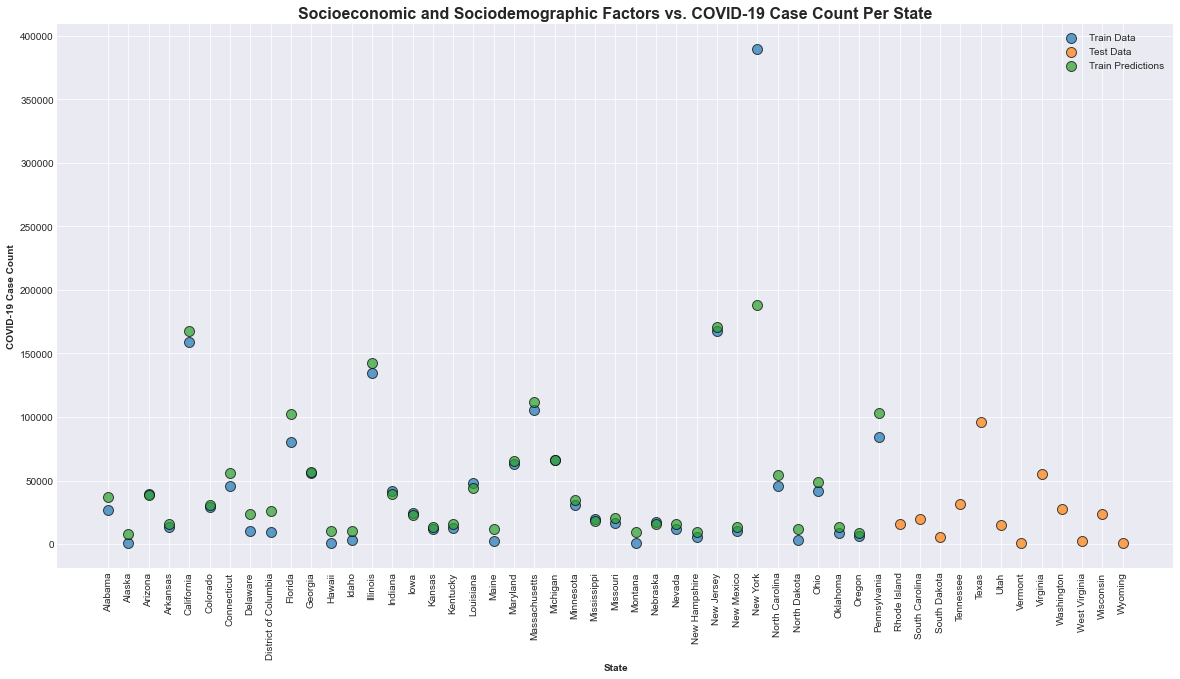

In [46]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

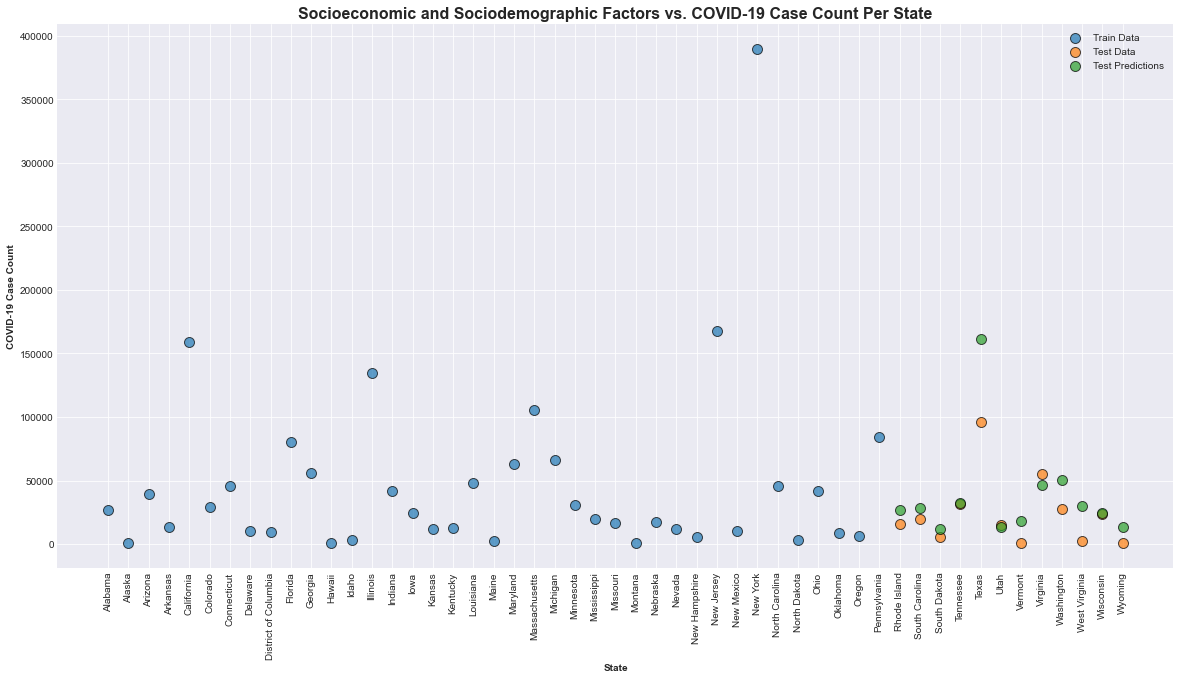

In [47]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();

In [48]:
base_accuracy = evaluate(XGBmodel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.8310 degrees.
Accuracy = 91.25%.


In [49]:
new_accuracy = evaluate(XG_NewModel, X_train_scaled, y_train_scaled)

Model Performance
Average Error: 0.7682 degrees.
Accuracy = 96.23%.


In [50]:
print('Improvement of {:0.2f}%.'.format( 100 * (new_accuracy - base_accuracy) / new_accuracy))

Improvement of 5.18%.


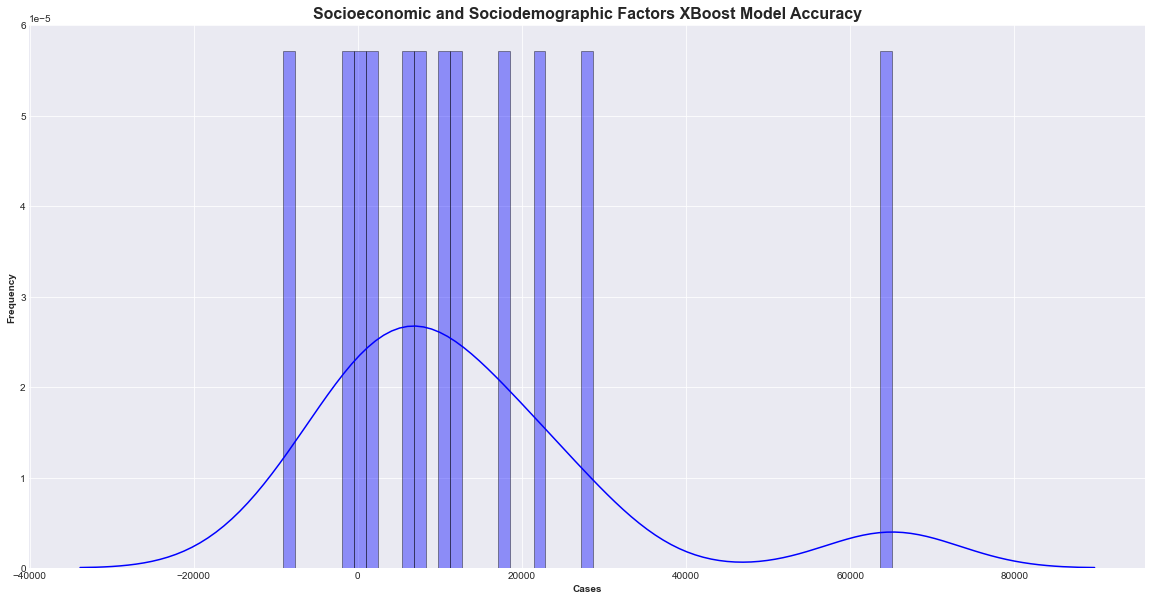

In [51]:
rcParams['figure.figsize'] = 20, 10

plt.figure()
sns.distplot((np.array(test_predictions).reshape(-1) - y_test), bins = 51, color = 'b', hist_kws = {'edgecolor':'k'})
plt.title('Socioeconomic and Sociodemographic Factors XBoost Model Accuracy', fontsize = 16, fontweight = 'bold')
plt.xlabel('Cases', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold')

plt.show();

## Logistic Regression

In [31]:
COVID_DFLogReg = COVID_DF

CasesMean = COVID_DFLogReg['cases'].mean()

COVID_DFLogReg['Cases_Avg'] = COVID_DFLogReg['cases'].apply(lambda x: classify(x, CasesMean))

COVID_DFLogReg.head(25)

,State,AGI Total,AGI Top 1 Percent,AGI Top 5 Percent,AGI Top 10 Percent,AGI Top 25 Percent,AGI Top 50 Percent,AGI Top 75 Percent,Total Population,Total population_Male,...,Technical Workers 2018 (Percent),Public School Expenditure 2016(Thousands),State GDP(Millions),School Expenditures per State GDP(Percent),Student Enrollment,School Expenditures per Student Enrollment(Percent),Public School Salary 2018(Dollars),cases,deaths,Cases_Avg
0,Alabama,119662909,18553159,35924229,49537638,76667112,101687773,114405941,4887871,2369271,...,1.377782,6885677.0,203398.0,3.385322,743789.0,9257.567670,50568.0,26912,785,0
1,Alaska,23969001,2848087,6184956,8915998,14554105,20064361,22927860,737438,382952,...,2.020619,2319662.0,49429.0,4.692917,132477.0,17509.922477,69682.0,751,10,0
2,Arizona,197753744,33609317,63073164,85351788,128616004,168531690,189378565,7171646,3565129,...,1.608712,8551673.0,311397.0,2.746228,1109040.0,7710.878778,48723.0,39298,1228,0
3,Arkansas,74634888,16319991,26475276,34256878,49689104,64088761,71584342,3013825,1476680,...,0.974284,4872214.0,120090.0,4.057135,492132.0,9900.217828,50544.0,13191,188,0
4,California,1549284943,356240355,600859502,772738760,1086299917,1360947743,1497300869,39557045,19673553,...,1.566938,72003129.0,2663396.0,2.703433,6305347.0,11419.376126,80680.0,159098,5202,1
5,Colorado,212581123,37479649,69617571,93359185,138935934,181679584,204043171,5695564,2864761,...,1.491620,8648369.0,329097.0,2.627909,899112.0,9618.789428,52701.0,29427,1617,0
6,Connecticut,175792834,47379889,74456114,92142733,125039874,155284852,170426876,3572665,1740533,...,1.627515,10551327.0,262979.0,4.012232,537933.0,19614.574678,74517.0,45349,4210,1
7,Delaware,31403165,4412370,8899481,12464894,19652753,26529258,30056514,967171,467924,...,1.308778,1941408.0,70380.0,2.758465,134847.0,14397.116732,61795.0,10403,424,0
8,District of Columbia,34743188,7442186,13245281,17240750,24153683,30301657,33570901,702455,334208,...,1.510451,1775833.0,129817.0,1.367951,84024.0,21134.830525,76486.0,9818,520,0
9,Florida,750608252,213461301,325886670,401558825,540976844,663846145,726074247,21299325,10404676,...,0.968327,25621239.0,938370.0,2.730398,2792234.0,9175.892493,48168.0,80101,2992,1


In [32]:
model2 = sm.OLS(COVID_DFLogReg['Cases_Avg'], COVID_DFLogReg[columns], missing = 'drop').fit()
model2.summary()

c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
c:\python38\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cases_Avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Jun 2020   Prob (F-statistic):                nan
Time:                        02:22:54   Log-Likelihood:                 1290.1
No. Observations:                  51   AIC:                            -2478.
Df Residuals:                       0   BIC:                            -2380.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
AGI Total                                                        -6.327e-07        inf         -0        nan         nan         nan
AGI Top 1 Percent                                                 2.335e-07        inf          0        nan         nan         nan
AGI Top 5 Percent                                                -7.366e-07        inf         -0        nan         nan         nan
AGI Top 10 Percent                                                4.836e-07        inf          0        nan         nan         nan
AGI Top 25 Percent                                                3.509e-07        inf          0        nan         nan         nan
AGI Top 50 Percent                                               -6.786e-07        inf         -0        nan         nan         nan
AGI Top 75 Percent                                                9.935e-07        inf          0        nan         nan         nan
Total Population                                                  1.812e-06        inf          0        nan         nan         nan
Total population_Male                                             7.499e-06        inf          0        nan         nan         nan
Total population_Female                                          -5.687e-06        inf         -0        nan         nan         nan
Under 5 years                                                     2.875e-05        inf          0        nan         nan         nan
5 to 9 years                                                     -2.675e-05        inf         -0        nan         nan         nan
10 to 14 years                                                   -5.298e-06        inf         -0        nan         nan         nan
15 to 19 years                                                    1.053e-05        inf          0        nan         nan         nan
20 to 24 years                                                   -5.655e-06        inf         -0        nan         nan         nan
25 to 34 years                                                   -5.218e-06        inf         -0        nan         nan         nan
35 to 44 years                                                    1.465e-06        inf          0        nan         nan         nan
45 to 54 years                                                    4.661e-06        inf          0        nan         nan         nan
55 to 59 years                                                   -3.761e-06        inf         -0        nan         nan         nan
60 to 64 years                                                    3.441e-06        inf          0        nan         nan         nan
65 to 74 years          

In [33]:
test_len = int(0.25 * len(COVID_DFLogReg))
train_len = len(COVID_DFLogReg) - test_len
print('Train Set Len: ' + str(train_len))
print('Test Set Len: ' + str(test_len))

train = COVID_DFLogReg[:train_len]
test = COVID_DFLogReg[train_len:]
print('Train Set Shape: ' + str(train.shape))
print('Test Set Shape: ' + str(test.shape))

Train Set Len: 39
Test Set Len: 12
Train Set Shape: (39, 96)
Test Set Shape: (12, 96)


In [34]:
features_list = columns
    
target = 'Cases_Avg'

X_train = train[features_list]
y_train = train[target]
X_test = test[features_list]
y_test = test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LogRegModel = LogisticRegression()
LogRegModel.fit(X_train_scaled, y_train)

train_predictions = LogRegModel.predict(X_train_scaled)
test_predictions = LogRegModel.predict(X_test_scaled)

Train_MAE = mean_absolute_error(y_train, train_predictions)
Train_MSE = mean_squared_error(y_train, train_predictions)
Train_RMS = sqrt(mean_squared_error(y_train, train_predictions))
Train_R2Score = r2_score(y_train, train_predictions)

Test_MAE = mean_absolute_error(y_test, test_predictions)
Test_MSE = mean_squared_error(y_test, test_predictions)
Test_RMS = sqrt(mean_squared_error(y_test, test_predictions))
Test_R2Score = r2_score(y_test, test_predictions)

print('Train MAE Value:', Train_MAE)
print('Train MSE Value:', Train_MSE)
print('Train RMS Value:', Train_RMS)
print('Train R2 Score:', Train_R2Score)
print('\n')

print('Test MAE Value:', Test_MAE)
print('Test MSE Value:', Test_MSE)
print('Test RMS Value:', Test_RMS)
print('Test R2 Score:', Test_R2Score)

Train MAE Value: 0.02564102564102564
Train MSE Value: 0.02564102564102564
Train RMS Value: 0.16012815380508713
Train R2 Score: 0.8885714285714286


Test MAE Value: 0.0
Test MSE Value: 0.0
Test RMS Value: 0.0
Test R2 Score: 1.0


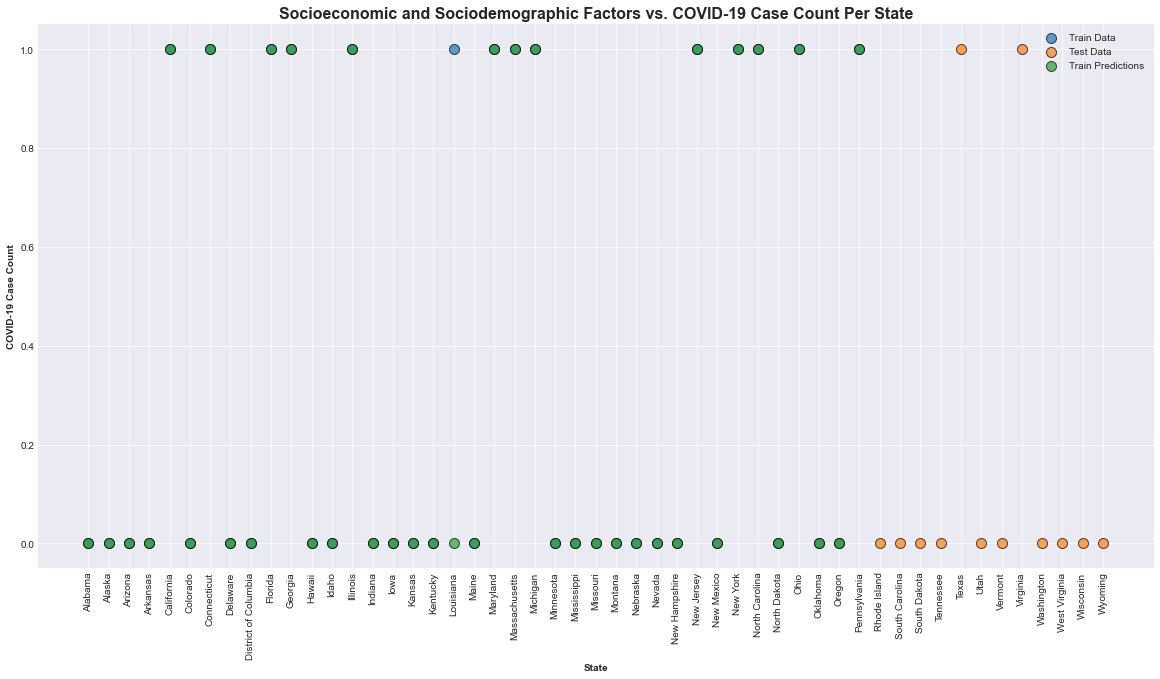

In [35]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = train['State'], y = train_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Train Predictions'])

plt.xticks(rotation = 90)
plt.show();

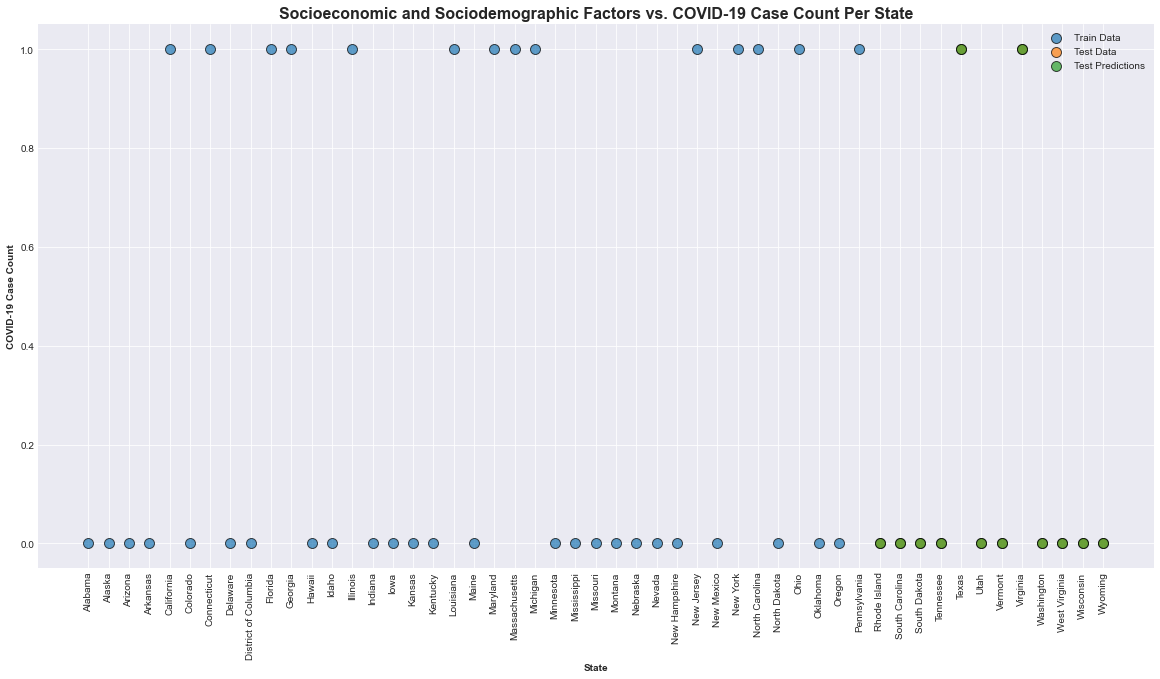

In [36]:
rcParams['figure.figsize'] = 20, 10

plt.figure()

plt.scatter(x = train['State'], y = train['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test['Cases_Avg'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.scatter(x = test['State'], y = test_predictions, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, cmap = 'inferno')
plt.title('Socioeconomic and Sociodemographic Factors vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Train Data', 'Test Data', 'Test Predictions'])

plt.xticks(rotation = 90)
plt.show();